<a href="https://colab.research.google.com/github/Navaneethp0/email-spam-classification/blob/main/email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABSTRACT
This study focuses on classifying emails as spam or ham (non-spam) using the Naive Bayes classification algorithm. The dataset consists of emails labeled as either spam or ham, along with their corresponding text content.
After preprocessing the text data (e.g., removing punctuation, converting to lowercase), the Naive Bayes model is trained on a portion of the dataset and evaluated using metrics such as accuracy, precision, recall, and F1-score. The model's performance is then assessed by predicting the labels for the remaining portion of the dataset.
The results demonstrate the effectiveness of the Naive Bayes algorithm in classifying emails as spam or ham based on their text content. However, further preprocessing and feature engineering techniques could potentially improve the model's performance. Overall, this study highlights the utility of Naive Bayes in email spam classification tasks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/mail_data.csv")
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
ham_spam=df['Category'].value_counts()
print(ham_spam)

Category
ham     4825
spam     747
Name: count, dtype: int64


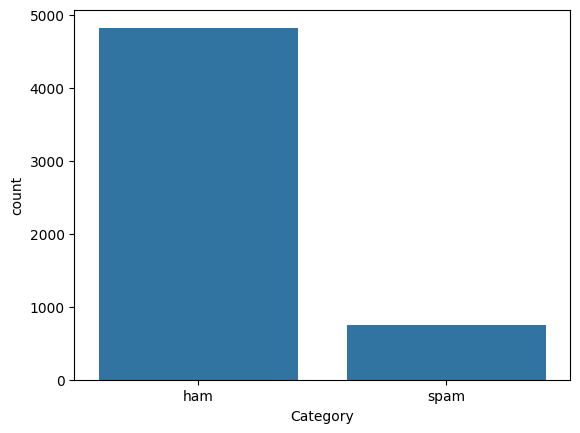

In [ ]:
#Let's visualize the distribution of Ham and Spam data

sns.countplot(x=df['Category'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# convert small words

df['Message']= df['Message'].str.lower()
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
import string
punc_to_rmv=string.punctuation
def remove_punctuation(message):
  translator=str.maketrans("","".punc_to_rmv)
  return message.translate(translator)
df['Message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Assuming you have already imported nltk and downloaded WordNet data

lemmatizer = WordNetLemmatizer()
def lemmatize_words(message):
  return " ".join([lemmatizer.lemmatize(word) for word in message.split()])

df['Message']=df['Message'].apply(lambda message:lemmatize_words(message))
df.head()



,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he go to usf, he life around..."


In [ ]:
x=df.Message
y=df.Category

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(x)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# show resulting vocabulary; the numbers are not counts,they are the position in the sparse vector.

coun_vect.vocabulary_

{'go': 3481,
 'until': 7832,
 'jurong': 4263,
 'point': 5781,
 'crazy': 2288,
 'available': 1297,
 'only': 5408,
 'in': 4003,
 'bugis': 1734,
 'great': 3562,
 'world': 8282,
 'la': 4385,
 'buffet': 1732,
 'cine': 2016,
 'there': 7456,
 'got': 3523,
 'amore': 1069,
 'wat': 8067,
 'ok': 5375,
 'lar': 4420,
 'joking': 4233,
 'wif': 8187,
 'oni': 5404,
 'free': 3290,
 'entry': 2892,
 'wkly': 8241,
 'comp': 2131,
 'to': 7563,
 'win': 8200,
 'fa': 3026,
 'cup': 2347,
 'final': 3141,
 'tkts': 7550,
 '21st': 409,
 'may': 4818,
 '2005': 400,
 'text': 7406,
 '87121': 789,
 'receive': 6149,
 'question': 6043,
 'std': 7053,
 'txt': 7737,
 'rate': 6094,
 'apply': 1155,
 '08452810075over18': 77,
 'dun': 2748,
 'say': 6473,
 'so': 6859,
 'early': 2769,
 'hor': 3847,
 'already': 1041,
 'then': 7450,
 'nah': 5112,
 'don': 2663,
 'think': 7470,
 'he': 3708,
 'usf': 7877,
 'life': 4504,
 'around': 1204,
 'here': 3756,
 'though': 7489,
 'freemsg': 3297,
 'hey': 3765,
 'darling': 2402,
 'it': 4136,
 'been'

In [ ]:
# shape of count vector; number of rows and unique words

count_matrix.shape

(5572, 8445)

In [ ]:
coun_vect.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [ ]:
vect = CountVectorizer(stop_words='english',ngram_range=(1,2))
x_vect = vect.fit_transform(x)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfid_transformer = TfidfTransformer()
x_tfidf = tfid_transformer.fit_transform(x_vect)

In [ ]:
tokens = vect.get_feature_names_out()
df_idf = pd.DataFrame(tfid_transformer.idf_,index=tokens,columns=['idf_weights'])
df_idf.head()

,idf_weights
00,7.227794
00 easter,8.932542
00 sub,7.546247
000,6.293484
000 bonus,7.546247


In [ ]:
#get tfidf vector for first document
first_document_vector=x_tfidf[0]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
jurong point,0.223235
available bugis,0.223235
amore wat,0.223235
amore,0.223235
la buffet,0.223235
...,...
fucking shitin,0.000000
fucking shoes,0.000000
fucking wouldn,0.000000
fuckinnice,0.000000


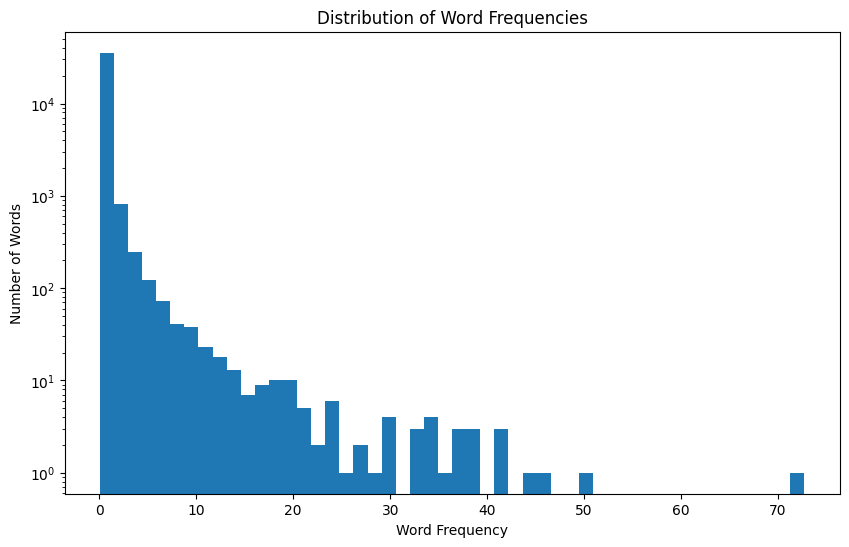

In [ ]:
# Sum up the word frequencies
word_frequencies = x_tfidf.sum(axis=0)

# Convert to a list for easier handling
word_frequencies = word_frequencies.tolist()[0]

# Step 2: Visualize the Distribution
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, log=True)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_tfidf, y)

In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled,test_size = 0.20, random_state=42)

In [ ]:
print(x_train.shape)
print(y_test.shape)

(7720, 36978)
(1930,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

mnb = MultinomialNB()
naive_model = mnb.fit(x_train,y_train)
y_pred_class = mnb.predict(x_test)

print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       990
        spam       0.98      1.00      0.99       940

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [ ]:
import joblib
joblib.dump(naive_model, 'emails.joblib')
joblib.dump(vect, 'CountVectorizer.joblib')
joblib.dump(tfid_transformer, 'tfid_transformer.joblib')

['tfid_transformer.joblib']

In [ ]:
model = joblib.load('emails.joblib')
vect = joblib.load('CountVectorizer.joblib')
tfid = joblib.load('tfid_transformer.joblib')

text1 ="Congratulations! You have won a free vacation. Claim your prize now!"
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text1])
preprocessed_text_tfidf = tfid.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The email is a spam!!!")
else:
    print("The email is not spam")

['spam']
The email is not spam


In [ ]:
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text2])
preprocessed_text_tfid = tfid.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The email is a spam!!!")
else:
    print("The email is not spam")

['spam']
The email is not spam
